In [2]:
!pip install -Uqq fastai gradio

In [3]:
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

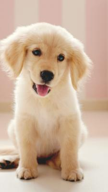

In [5]:
img = PILImage.create('dog.jpg')
img.thumbnail((192, 192))
img

In [6]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [7]:
learner = load_learner('cat.pkl')

In [8]:
learner.predict(img)

('False', tensor(0), tensor([9.9995e-01, 4.9973e-05]))

In [9]:
categories = ['Dog', 'Cat']

def classify_image(img):
    pred,idx,probs = learner.predict(img)
    return dict(zip(categories, map(float, probs)))

In [10]:
classify_image(img)

{'Dog': 0.9999500513076782, 'Cat': 4.9972972192335874e-05}

In [11]:
image = gr.Image(height=192, width=192)
labels = gr.Label()
examples = ['dog.jpg', 'cat.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=labels, examples=examples)
intf.launch(inline=False)

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
